In [1]:
import pandas as pd
import numpy as np
import unicodedata


from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
tweets = pd.read_csv("stock_tweets.csv",low_memory=False)
stocks = pd.read_csv("stock_yfinance_data.csv")
stock_name = "TSLA"
all_stocks = stocks[stocks['Stock Name'] == stock_name]
df = tweets[tweets["Stock Name"]== stock_name]
df

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc."
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc."
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc."
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc."


In [3]:
sent_df = df.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''

In [4]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [5]:


for indx, row in sent_df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df.loc[indx, 'Tweet'])
        print (indx)
        break
sent_df


C:\Users\jishn\AppData\Local\Temp\ipykernel_21600\3389750844.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for indx, row in sent_df.T.iteritems():


,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.127,0.758,0.115
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0,0.0,1.0,0.0
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.296,0.0,0.951,0.049
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.273,0.59,0.137
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.875,0.526,0.474,0.0
...,...,...,...,...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",-0.1531,0.197,0.656,0.148
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc.",0.5719,0.078,0.747,0.175
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc.",0.0,0.0,1.0,0.0
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc.",0.4215,0.0,0.743,0.257


In [6]:
#(sent_df["sentiment_score"]>0).sum().sum()
sent_df['Date'] = pd.to_datetime(sent_df['Date'])
sent_df['Date'] = sent_df['Date'].dt.date
sent_df = sent_df.drop(columns=['Negative', 'Positive', 'Neutral', 'Stock Name', 'Company Name'])
sent_df

,Date,Tweet,sentiment_score
0,2022-09-29,Mainstream media has done an amazing job at br...,0.0772
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,0.0
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,0.296
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,-0.7568
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",-0.875
...,...,...,...
37417,2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,-0.1531
37418,2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,0.5719
37419,2021-09-30,Hold. On. Tight. $TSLA,0.0
37420,2021-09-30,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,0.4215


In [7]:
twitter_df = sent_df.groupby([sent_df['Date']]).mean()
(twitter_df["sentiment_score"]==0).sum().sum()
twitter_df

C:\Users\jishn\AppData\Local\Temp\ipykernel_21600\433481693.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twitter_df = sent_df.groupby([sent_df['Date']]).mean()


,sentiment_score
Date,
2021-09-30,0.231552
2021-10-01,0.233704
2021-10-02,0.271940
2021-10-03,0.271570
2021-10-04,0.135388
...,...
2022-09-25,0.099081
2022-09-26,0.145532
2022-09-27,0.188188


In [8]:
threshold = 0.1

sentiments = []

for sent_score in twitter_df["sentiment_score"]:
    if sent_score == 0:
        sentiments.append("Neutral")
    elif sent_score < threshold:
        sentiments.append("Negative")
    else:
        sentiments.append("Positive")
twitter_df["Sentiments"] = sentiments
(twitter_df["Sentiments"]=='Positive').sum().sum()
twitter_df

,sentiment_score,Sentiments
Date,,
2021-09-30,0.231552,Positive
2021-10-01,0.233704,Positive
2021-10-02,0.271940,Positive
2021-10-03,0.271570,Positive
2021-10-04,0.135388,Positive
...,...,...
2022-09-25,0.099081,Negative
2022-09-26,0.145532,Positive
2022-09-27,0.188188,Positive


In [9]:
stock_df = all_stocks[all_stocks['Stock Name'] == stock_name]
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA


In [10]:
final_df = stock_df.join(twitter_df, how="left", on="Date")
final_df = final_df.drop(columns=['Stock Name',"Open","High","Low","Close"])


In [11]:
final_df.set_index("Date",inplace=True)
final_df

,Adj Close,Volume,sentiment_score,Sentiments
Date,,,,
2021-09-30,258.493347,53868000,0.231552,Positive
2021-10-01,258.406677,51094200,0.233704,Positive
2021-10-04,260.510010,91449900,0.135388,Positive
2021-10-05,260.196655,55297800,0.069445,Negative
2021-10-06,260.916656,43898400,0.199940,Positive
...,...,...,...,...
2022-09-23,275.329987,63748400,0.143601,Positive
2022-09-26,276.010010,58076900,0.145532,Positive
2022-09-27,282.940002,61925200,0.188188,Positive


In [12]:
final_df["Sentiments"].value_counts()

Positive    210
Negative     42
Name: Sentiments, dtype: int64

In [13]:
final_df["Price Difference"] = final_df["Adj Close"].diff()
final_df.dropna(inplace=True)
final_df

,Adj Close,Volume,sentiment_score,Sentiments,Price Difference
Date,,,,,
2021-10-01,258.406677,51094200,0.233704,Positive,-0.086670
2021-10-04,260.510010,91449900,0.135388,Positive,2.103333
2021-10-05,260.196655,55297800,0.069445,Negative,-0.313354
2021-10-06,260.916656,43898400,0.199940,Positive,0.720001
2021-10-07,264.536682,57587400,0.192548,Positive,3.620026
...,...,...,...,...,...
2022-09-23,275.329987,63748400,0.143601,Positive,-13.260010
2022-09-26,276.010010,58076900,0.145532,Positive,0.680023
2022-09-27,282.940002,61925200,0.188188,Positive,6.929993


In [14]:
Rise = 1 
Fall = 0 
final_df["Stock Trend"]=np.where(final_df["Price Difference"]>0,Rise,Fall)
final_df

,Adj Close,Volume,sentiment_score,Sentiments,Price Difference,Stock Trend
Date,,,,,,
2021-10-01,258.406677,51094200,0.233704,Positive,-0.086670,0
2021-10-04,260.510010,91449900,0.135388,Positive,2.103333,1
2021-10-05,260.196655,55297800,0.069445,Negative,-0.313354,0
2021-10-06,260.916656,43898400,0.199940,Positive,0.720001,1
2021-10-07,264.536682,57587400,0.192548,Positive,3.620026,1
...,...,...,...,...,...,...
2022-09-23,275.329987,63748400,0.143601,Positive,-13.260010,0
2022-09-26,276.010010,58076900,0.145532,Positive,0.680023,1
2022-09-27,282.940002,61925200,0.188188,Positive,6.929993,1


In [15]:
new_final = final_df[['Adj Close','Volume','Sentiments','Stock Trend']]

new_final = pd.get_dummies(new_final,columns=["Sentiments"])
new_final

,Adj Close,Volume,Stock Trend,Sentiments_Negative,Sentiments_Positive
Date,,,,,
2021-10-01,258.406677,51094200,0,0,1
2021-10-04,260.510010,91449900,1,0,1
2021-10-05,260.196655,55297800,0,1,0
2021-10-06,260.916656,43898400,1,0,1
2021-10-07,264.536682,57587400,1,0,1
...,...,...,...,...,...
2022-09-23,275.329987,63748400,0,0,1
2022-09-26,276.010010,58076900,1,0,1
2022-09-27,282.940002,61925200,1,0,1


Model


In [16]:
x = new_final.copy()
x.drop("Stock Trend",axis=1,inplace=True)
y = final_df["Stock Trend"].values.reshape(-1,1)


In [17]:
split = int(0.2*len(x))
x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]

In [18]:
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter as ti


rf = RandomForestRegressor()
rf.fit(x_train,y_train)
#prediction, bias, contributions = ti.predict(rf,x_test)
y_pred = rf.predict(x_test)

for i,y in np.ndenumerate(y_pred):
    if y<0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
    


print('Accuracy: %.3f (%.3f)' % (np.mean(y_pred), np.std(y_pred)))
y_pred.astype(int)


C:\Users\jishn\AppData\Local\Temp\ipykernel_21600\4171691756.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Accuracy: 0.731 (0.443)


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy_score(y_pred,y_test)

0.46766169154228854

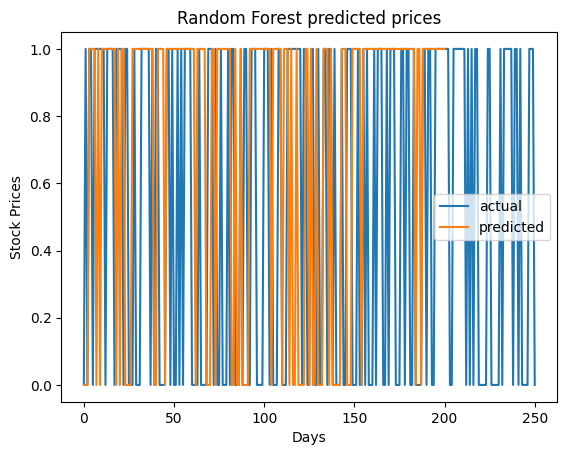

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(final_df['Stock Trend'].iloc[:].values)
plt.plot(y_pred.flatten())
plt.title('Random Forest predicted prices')
plt.ylabel('Stock Prices')
plt.xlabel('Days')
plt.legend(['actual', 'predicted'])
plt.show()

In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test, y_pred.flatten()))
print(rmse)

0.7296151783356152


SVM

In [22]:
from sklearn import svm
from sklearn.svm import SVR
y1 = final_df["Stock Trend"].values.reshape(-1,1)

In [23]:
y12 = y1.flatten()

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y12,train_size=0.8)
##ytrain = ytrain.reshape(-1,1)
#ytest = ytest.reshape(-1,1)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaler = scaler.fit(xtrain)
x_train_scaled = x_scaler.transform(xtrain)
x_test_scaled = x_scaler.transform(xtest)

In [26]:
ytrain.flatten()

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0])

In [27]:
svr_rbf = SVR(kernel='rbf', C=1e6, gamma=0.1)
svr_rbf.fit(x_train_scaled,ytrain.flatten())

SVR(C=1000000.0, gamma=0.1)

In [28]:
output = svr_rbf.predict(x_test_scaled)
output
svr_rbf.score(x_test_scaled,ytest)

-23.799479561707457

In [29]:
asd
o1 = output.reshape(-1,1)
y_scaler.inverse_transform(o1)

NameError: name 'asd' is not defined

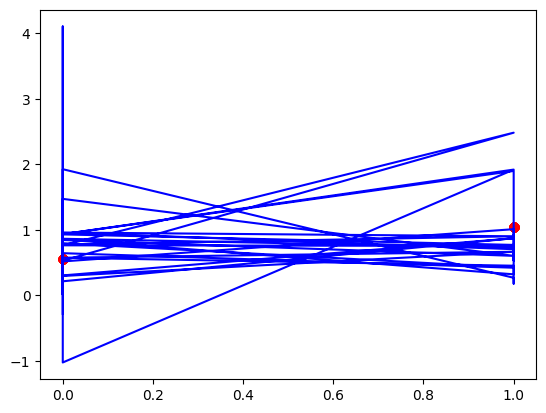

In [ ]:
plt.scatter(ytrain, y_scaler.inverse_transform(ytrain), color = 'red')
plt.plot(ytest, y_scaler.inverse_transform(svr_rbf.predict(x_test_scaled).reshape(-1,1)), color = 'blue')
